In [ ]:
!pip install scikit-learn==1.3.0 --upgrade
!pip install xgboost --upgrade

# **DIMAS PRIYA KUSUMA SAPUTRRA**

# ***1. Dataset***

In [52]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Mengabaikan peringatan FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Membaca dataset
parkinson = pd.read_csv('/content/parkinsons_disease_data.csv', encoding='latin-1')

# Menampilkan 20 baris pertama untuk melihat data
parkinson.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [53]:
# Informasi dataset seperti tipe data dan jumlah data yang ada
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

In [54]:
# Mengecek jumlah missing values per kolom
parkinson.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [55]:
# Drop kolom yang tidak relevan
parkinson = parkinson.drop(columns=['PatientID', 'DoctorInCharge'], errors='ignore')

In [56]:
for col in parkinson.columns:
    print(f"Unique values in '{col}': {parkinson[col].unique()}")

Unique values in 'Age': [85 75 70 52 87 68 78 80 71 53 74 58 56 54 57 51 55 62 79 60 63 66 61 88
 76 69 72 64 73 83 81 50 67 82 59 77 65 89 84 86]
Unique values in 'Gender': [0 1]
Unique values in 'Ethnicity': [3 0 2 1]
Unique values in 'EducationLevel': [1 2 0 3]
Unique values in 'BMI': [19.61987796 16.24733916 15.36823871 ... 22.82963142 16.87103048
 16.56993435]
Unique values in 'Smoking': [0 1]
Unique values in 'AlcoholConsumption': [5.10824061 6.02764803 2.24213533 ... 6.15228603 0.2920939  1.98508408]
Unique values in 'PhysicalActivity': [1.38065992 8.40980405 0.21327459 ... 5.77510265 2.28047465 1.40044141]
Unique values in 'DietQuality': [3.89396914 8.51342825 6.49880461 ... 0.33424438 9.59851335 9.88383538]
Unique values in 'SleepQuality': [9.28319445 5.60246951 9.92982381 ... 9.74001923 8.2893901  9.93003746]
Unique values in 'FamilyHistoryParkinsons': [0 1]
Unique values in 'TraumaticBrainInjury': [0 1]
Unique values in 'Hypertension': [0 1]
Unique values in 'Diabetes': [0 1

In [57]:
duplicates = parkinson.duplicated().sum()
print(f"Jumlah Duplikasi: {duplicates}")

Jumlah Duplikasi: 0


In [58]:
# Menampilkan nama-nama kolom
print(parkinson.columns)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 'Hypertension',
       'Diabetes', 'Depression', 'Stroke', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')


# ***2. Pre-Processing***

In [59]:
# Mengisi missing values pada kolom-kolom yang relevan dengan mode (untuk data kategorikal) atau mean (untuk data numerik)
for col in parkinson.columns:
    if parkinson[col].dtype in ['float64', 'int64']:  # Check if column is numeric
        parkinson[col] = parkinson[col].fillna(parkinson[col].mean())
    else:  # Assume the column is categorical
        parkinson[col] = parkinson[col].fillna(parkinson[col].mode()[0])


In [60]:
# Encoding kolom kategoris
label_encoders = {}
categorical_columns = ['Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis']

for col in categorical_columns:
    le = LabelEncoder()
    parkinson[col] = le.fit_transform(parkinson[col])
    label_encoders[col] = le

In [61]:
# Membersihkan kolom dengan menghilangkan spasi di awal dan akhir nama kolom
parkinson.columns = parkinson.columns.str.strip()

In [62]:
for col in parkinson.columns:
    print(f"Unique values in '{col}': {parkinson[col].unique()}")

Unique values in 'Age': [85 75 70 52 87 68 78 80 71 53 74 58 56 54 57 51 55 62 79 60 63 66 61 88
 76 69 72 64 73 83 81 50 67 82 59 77 65 89 84 86]
Unique values in 'Gender': [0 1]
Unique values in 'Ethnicity': [3 0 2 1]
Unique values in 'EducationLevel': [1 2 0 3]
Unique values in 'BMI': [414 116  36 ... 708 169 145]
Unique values in 'Smoking': [0 1]
Unique values in 'AlcoholConsumption': [522 622 211 ... 637  30 184]
Unique values in 'PhysicalActivity': [ 267 1758   35 ... 1209  482  272]
Unique values in 'DietQuality': [ 847 1811 1396 ...   79 2019 2081]
Unique values in 'SleepQuality': [1842  571 2078 ... 2012 1482 2079]
Unique values in 'FamilyHistoryParkinsons': [0 1]
Unique values in 'TraumaticBrainInjury': [0 1]
Unique values in 'Hypertension': [0 1]
Unique values in 'Diabetes': [0 1]
Unique values in 'Depression': [0 1]
Unique values in 'Stroke': [0 1]
Unique values in 'SystolicBP': [39 73 23 56 25 61 32 43 79 48 75 21 49 18 35 14 50 30 88 80  8 62 58 86
 37 42 44  1 38 66 27 6

<Axes: ylabel='count'>

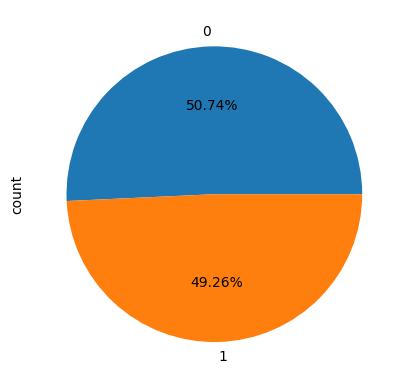

In [63]:
# Visualisasi distribusi Gender dari pasien
parkinson['Gender'].value_counts().plot(kind='pie', autopct="%.2f%%")

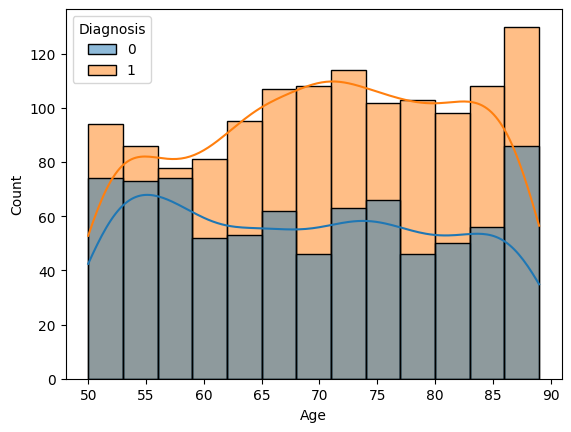

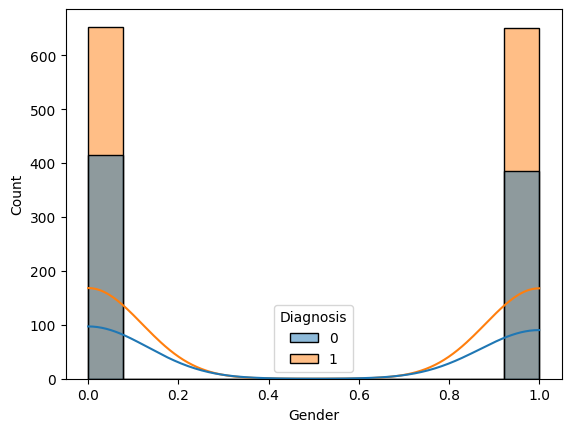

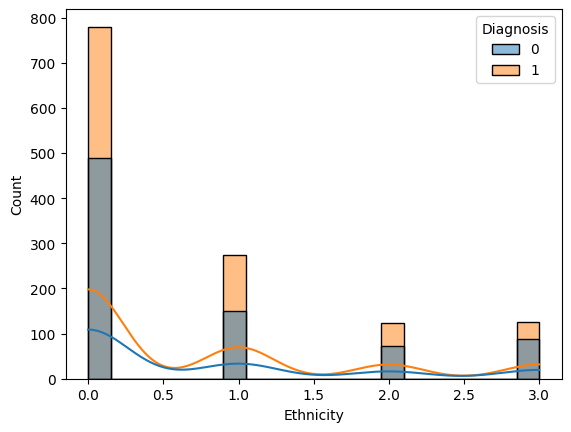

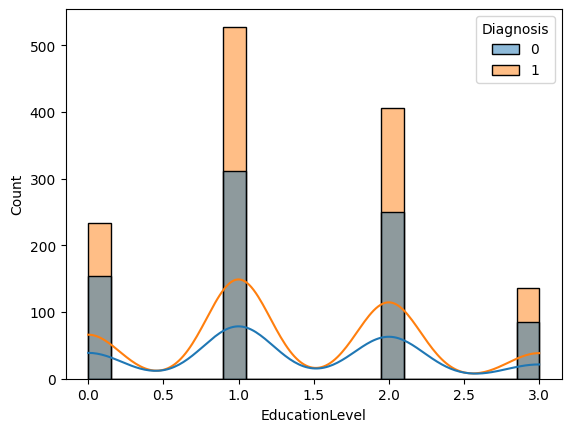

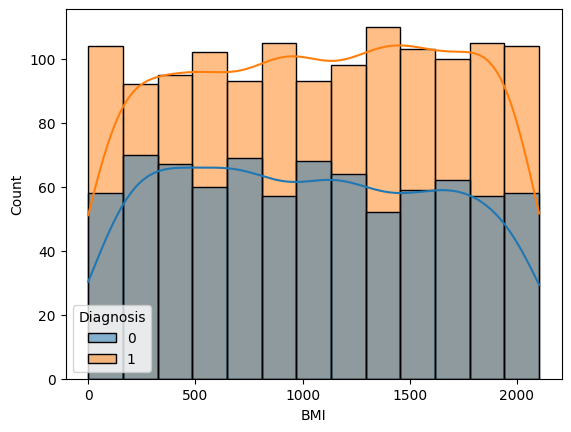

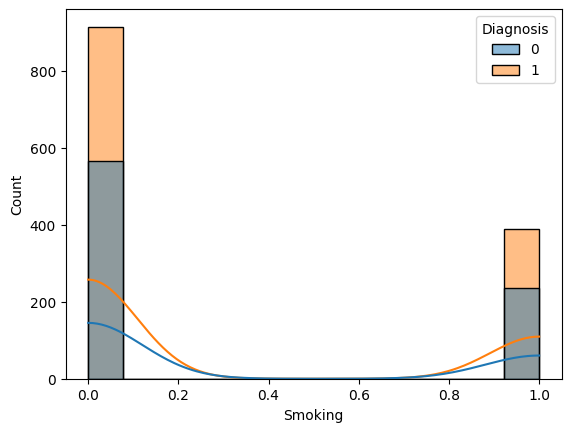

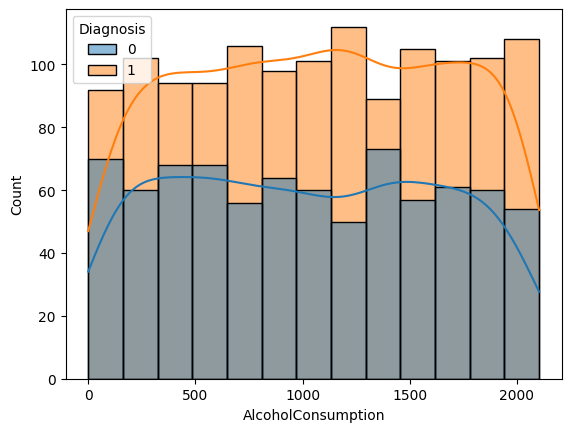

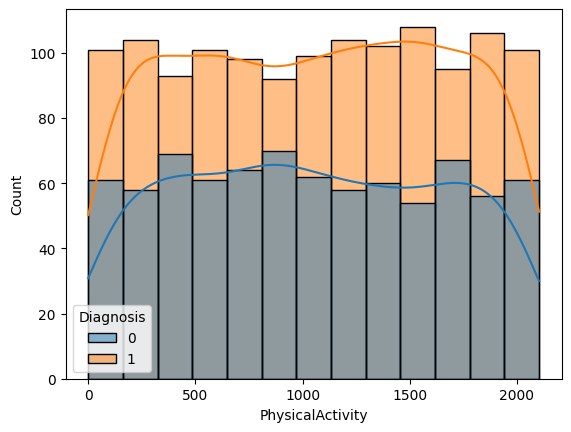

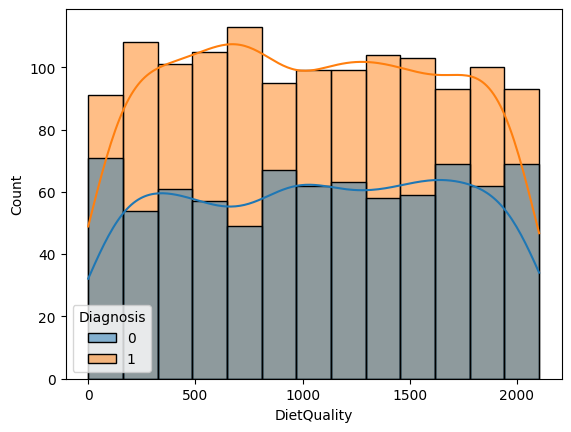

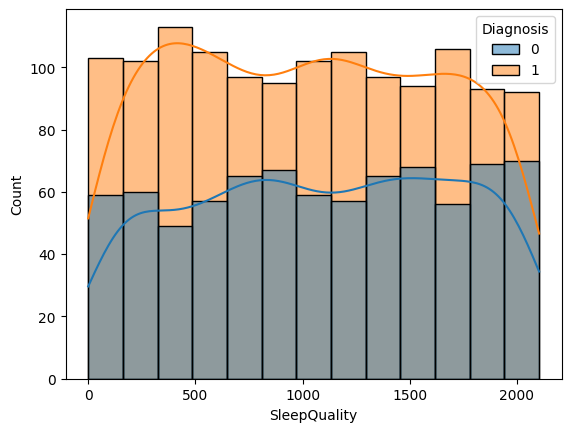

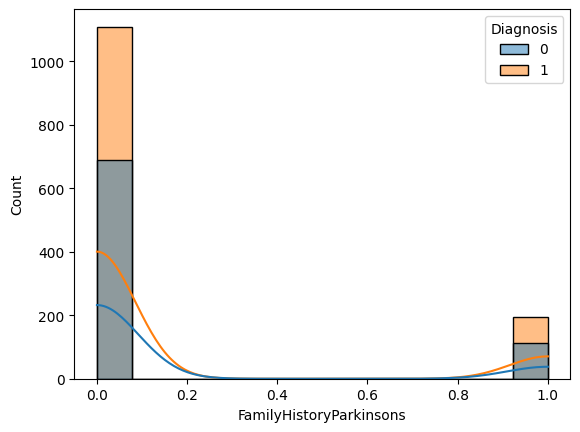

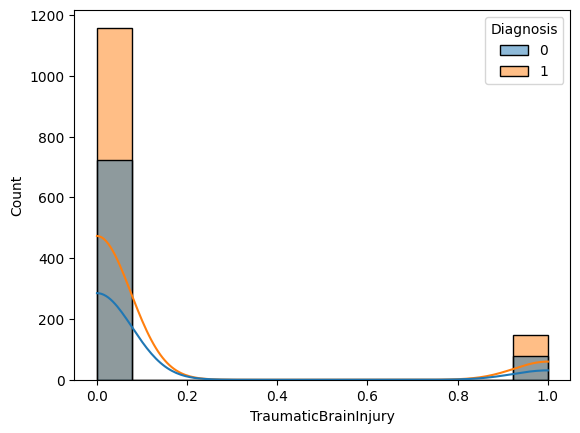

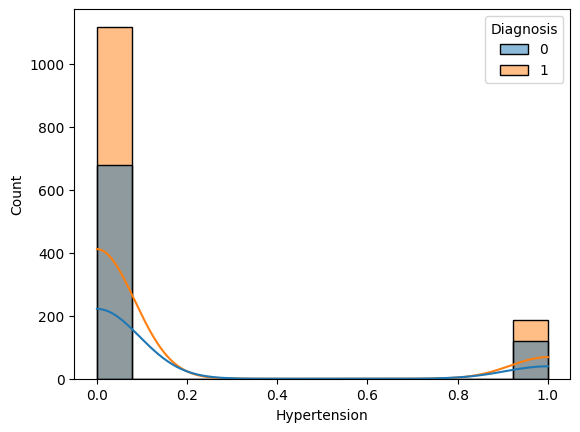

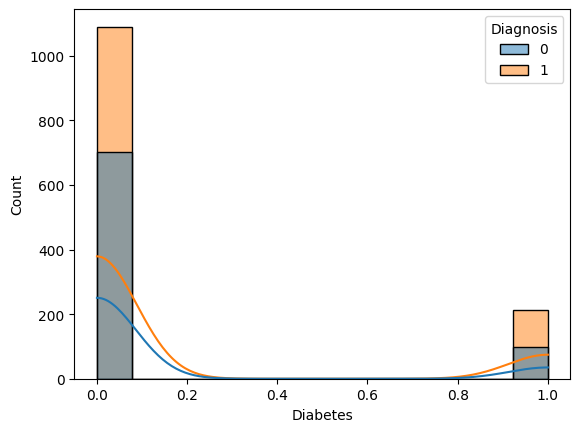

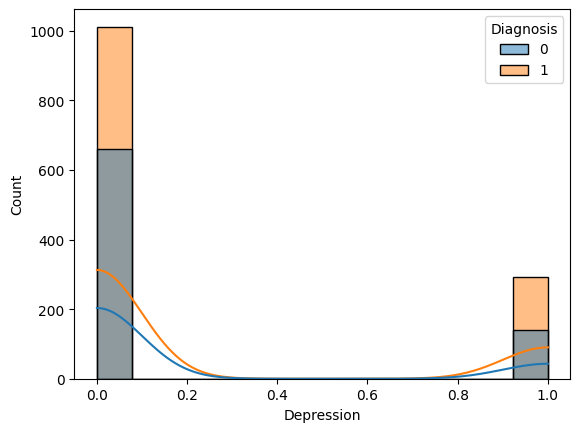

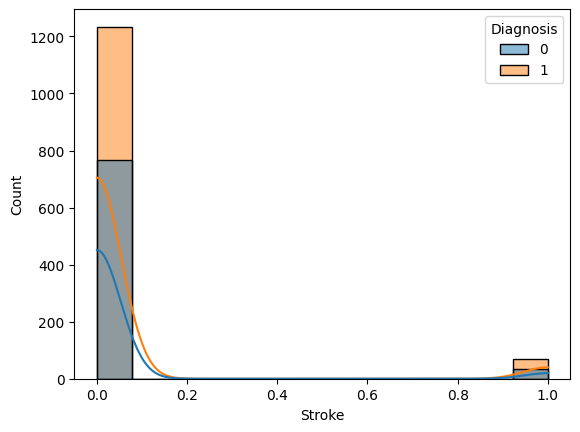

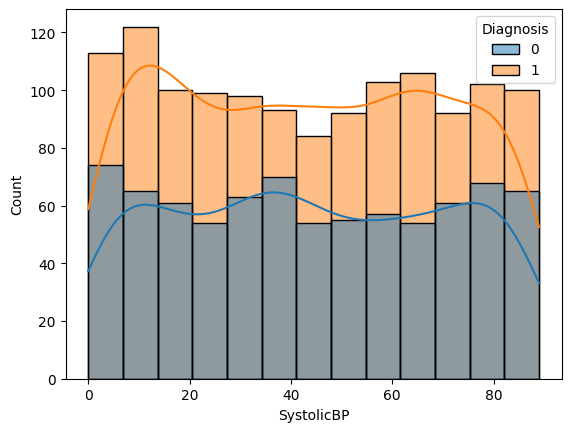

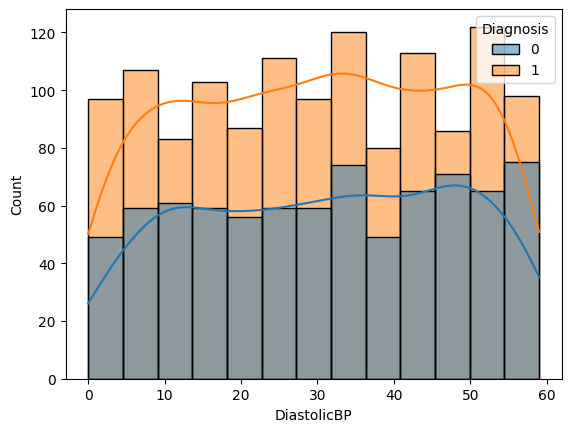

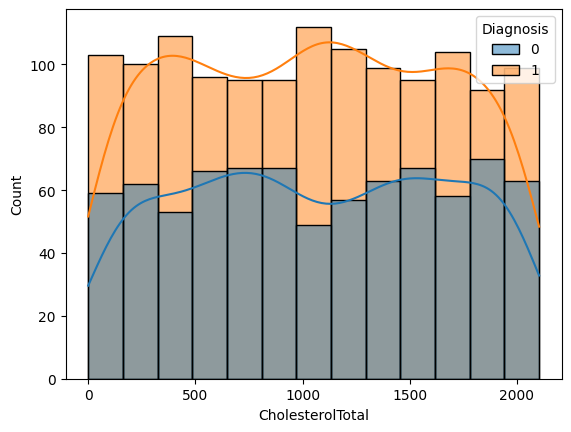

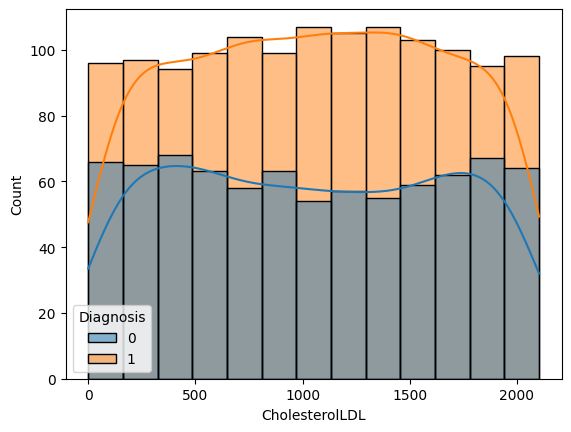

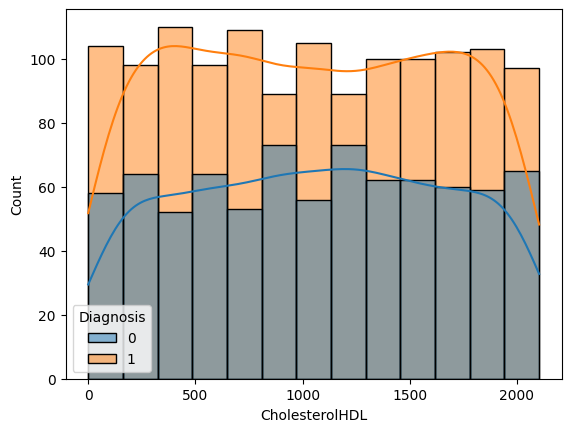

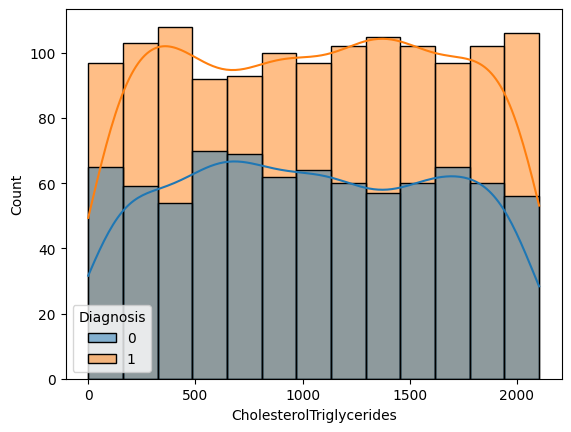

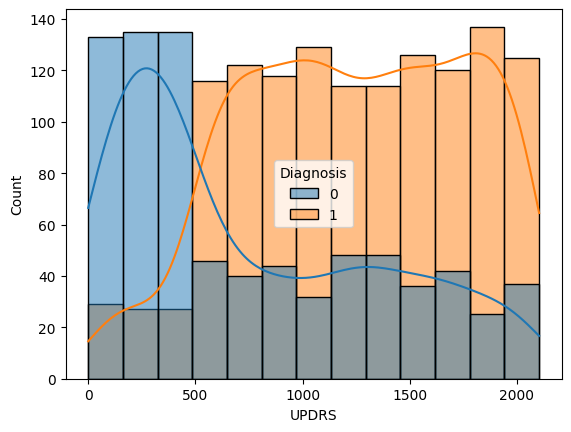

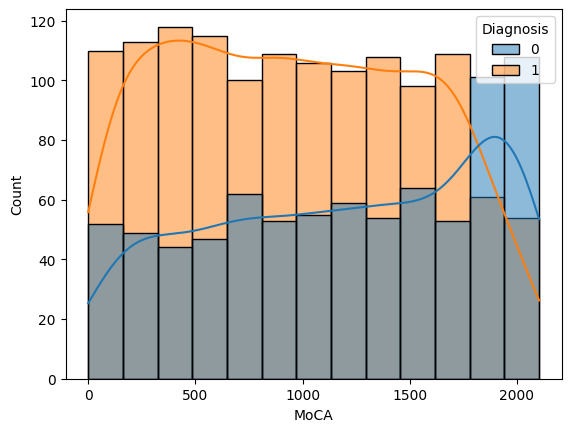

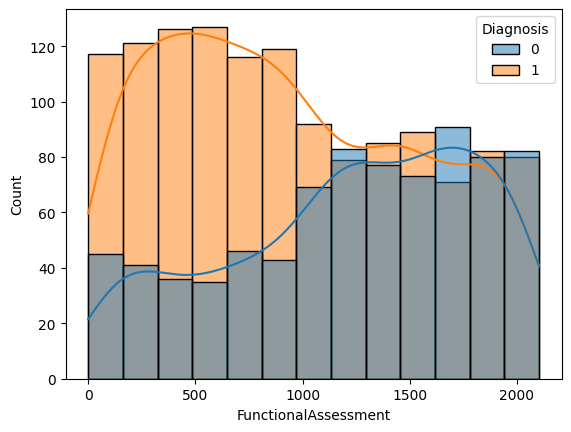

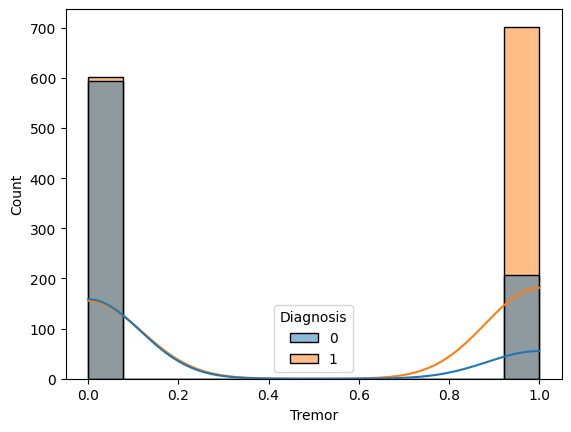

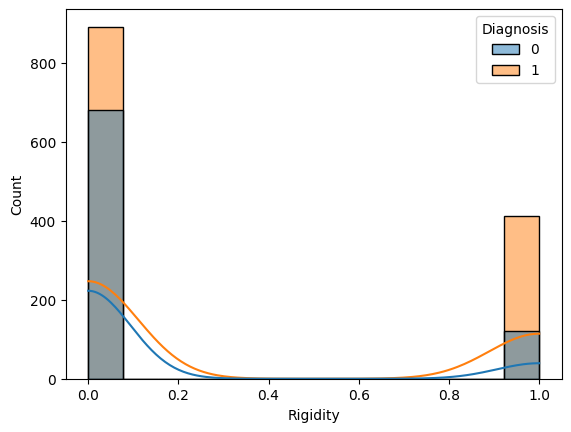

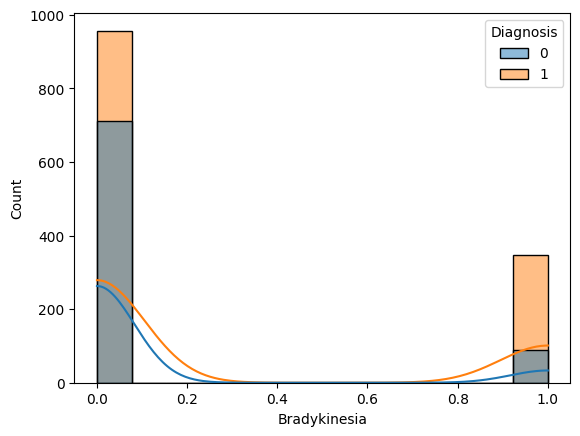

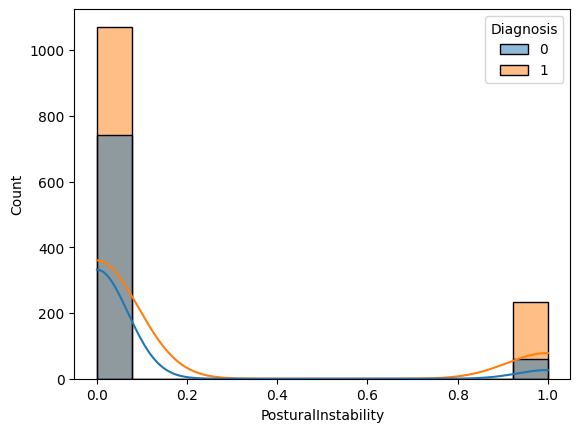

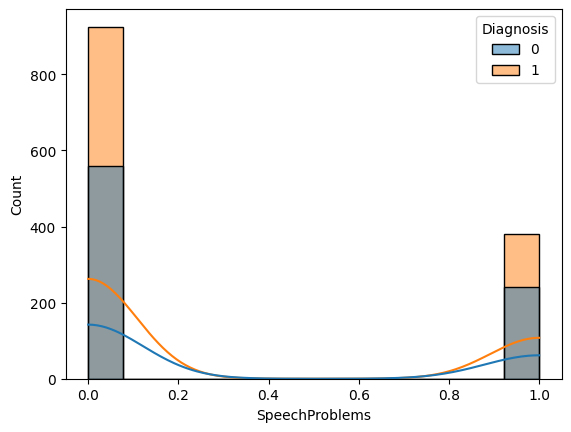

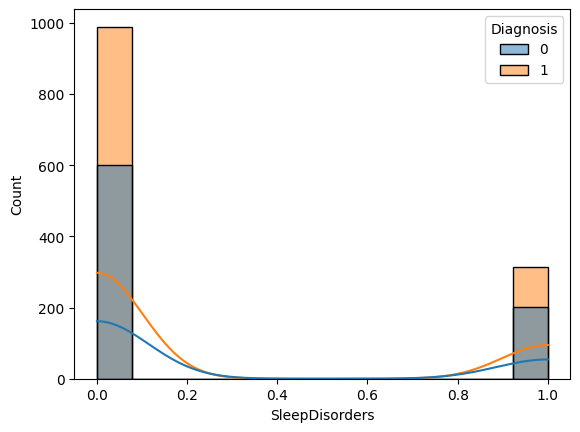

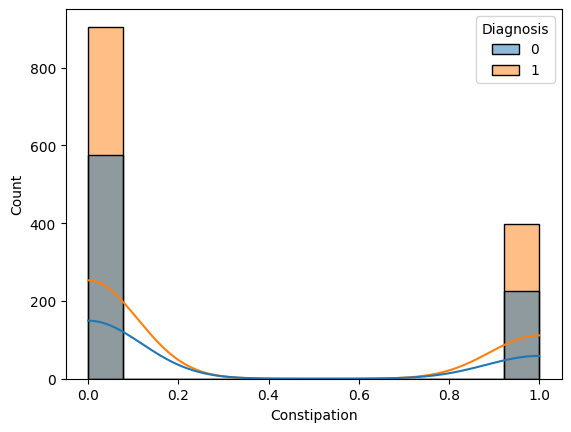

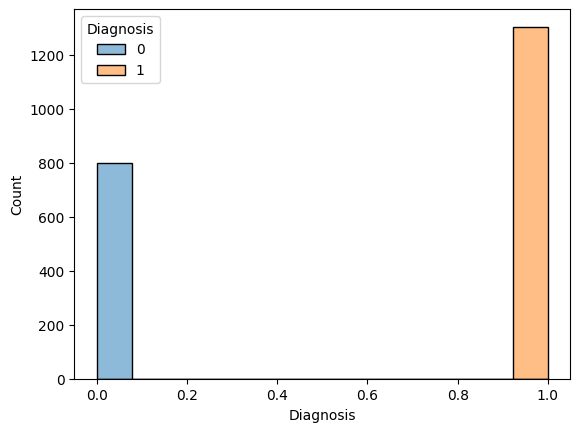

In [64]:
# Visualisasi distribusi data berdasarkan kelas 'Result'
for col in parkinson.columns:
    plt.figure()
    sns.histplot(data=parkinson, x=col, hue="Diagnosis", kde=True)
    plt.show()

In [65]:
# Menampilkan jumlah nilai dalam kolom 'Diagnosis'
parkinson['Diagnosis'].value_counts()

,count
Diagnosis,
1,1304
0,801


In [66]:
# Mapping hasil klasifikasi 'Diagnosis' menjadi 1 untuk pasien terkena parkinson dan 0 untuk non-pasien parkinson
parkinson['Diagnosis'] = parkinson['Diagnosis'].map({1: 1, 2: 0}).fillna(0).astype(int)

In [67]:
# Menampilkan 20 baris pertama setelah preprocessing
parkinson.head(20)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,414,0,522,267,847,1842,...,2051,334,1,0,0,0,0,0,0,0
1,75,0,0,2,116,1,622,1758,1811,571,...,867,1013,0,1,0,1,0,1,0,1
2,70,1,0,0,36,0,211,35,1396,2078,...,2100,475,1,0,0,0,1,0,1,1
3,52,0,0,0,48,0,618,265,1444,78,...,1469,732,1,1,1,0,0,0,1,1
4,87,0,0,1,312,0,1014,226,1016,1862,...,591,693,0,0,0,1,0,1,0,0
5,68,1,2,1,2064,1,1441,1633,1505,1303,...,1920,1444,0,0,0,0,0,0,0,0
6,78,1,0,0,1327,1,188,1890,2073,700,...,1190,119,1,0,0,0,1,0,0,0
7,70,1,0,0,1861,1,2104,833,735,1350,...,772,254,1,0,0,1,0,0,1,1
8,80,0,2,1,646,1,756,556,1041,67,...,767,743,0,0,0,0,0,0,0,1
9,71,0,3,2,785,1,1878,1536,730,1822,...,1845,1121,0,0,0,0,0,1,0,0


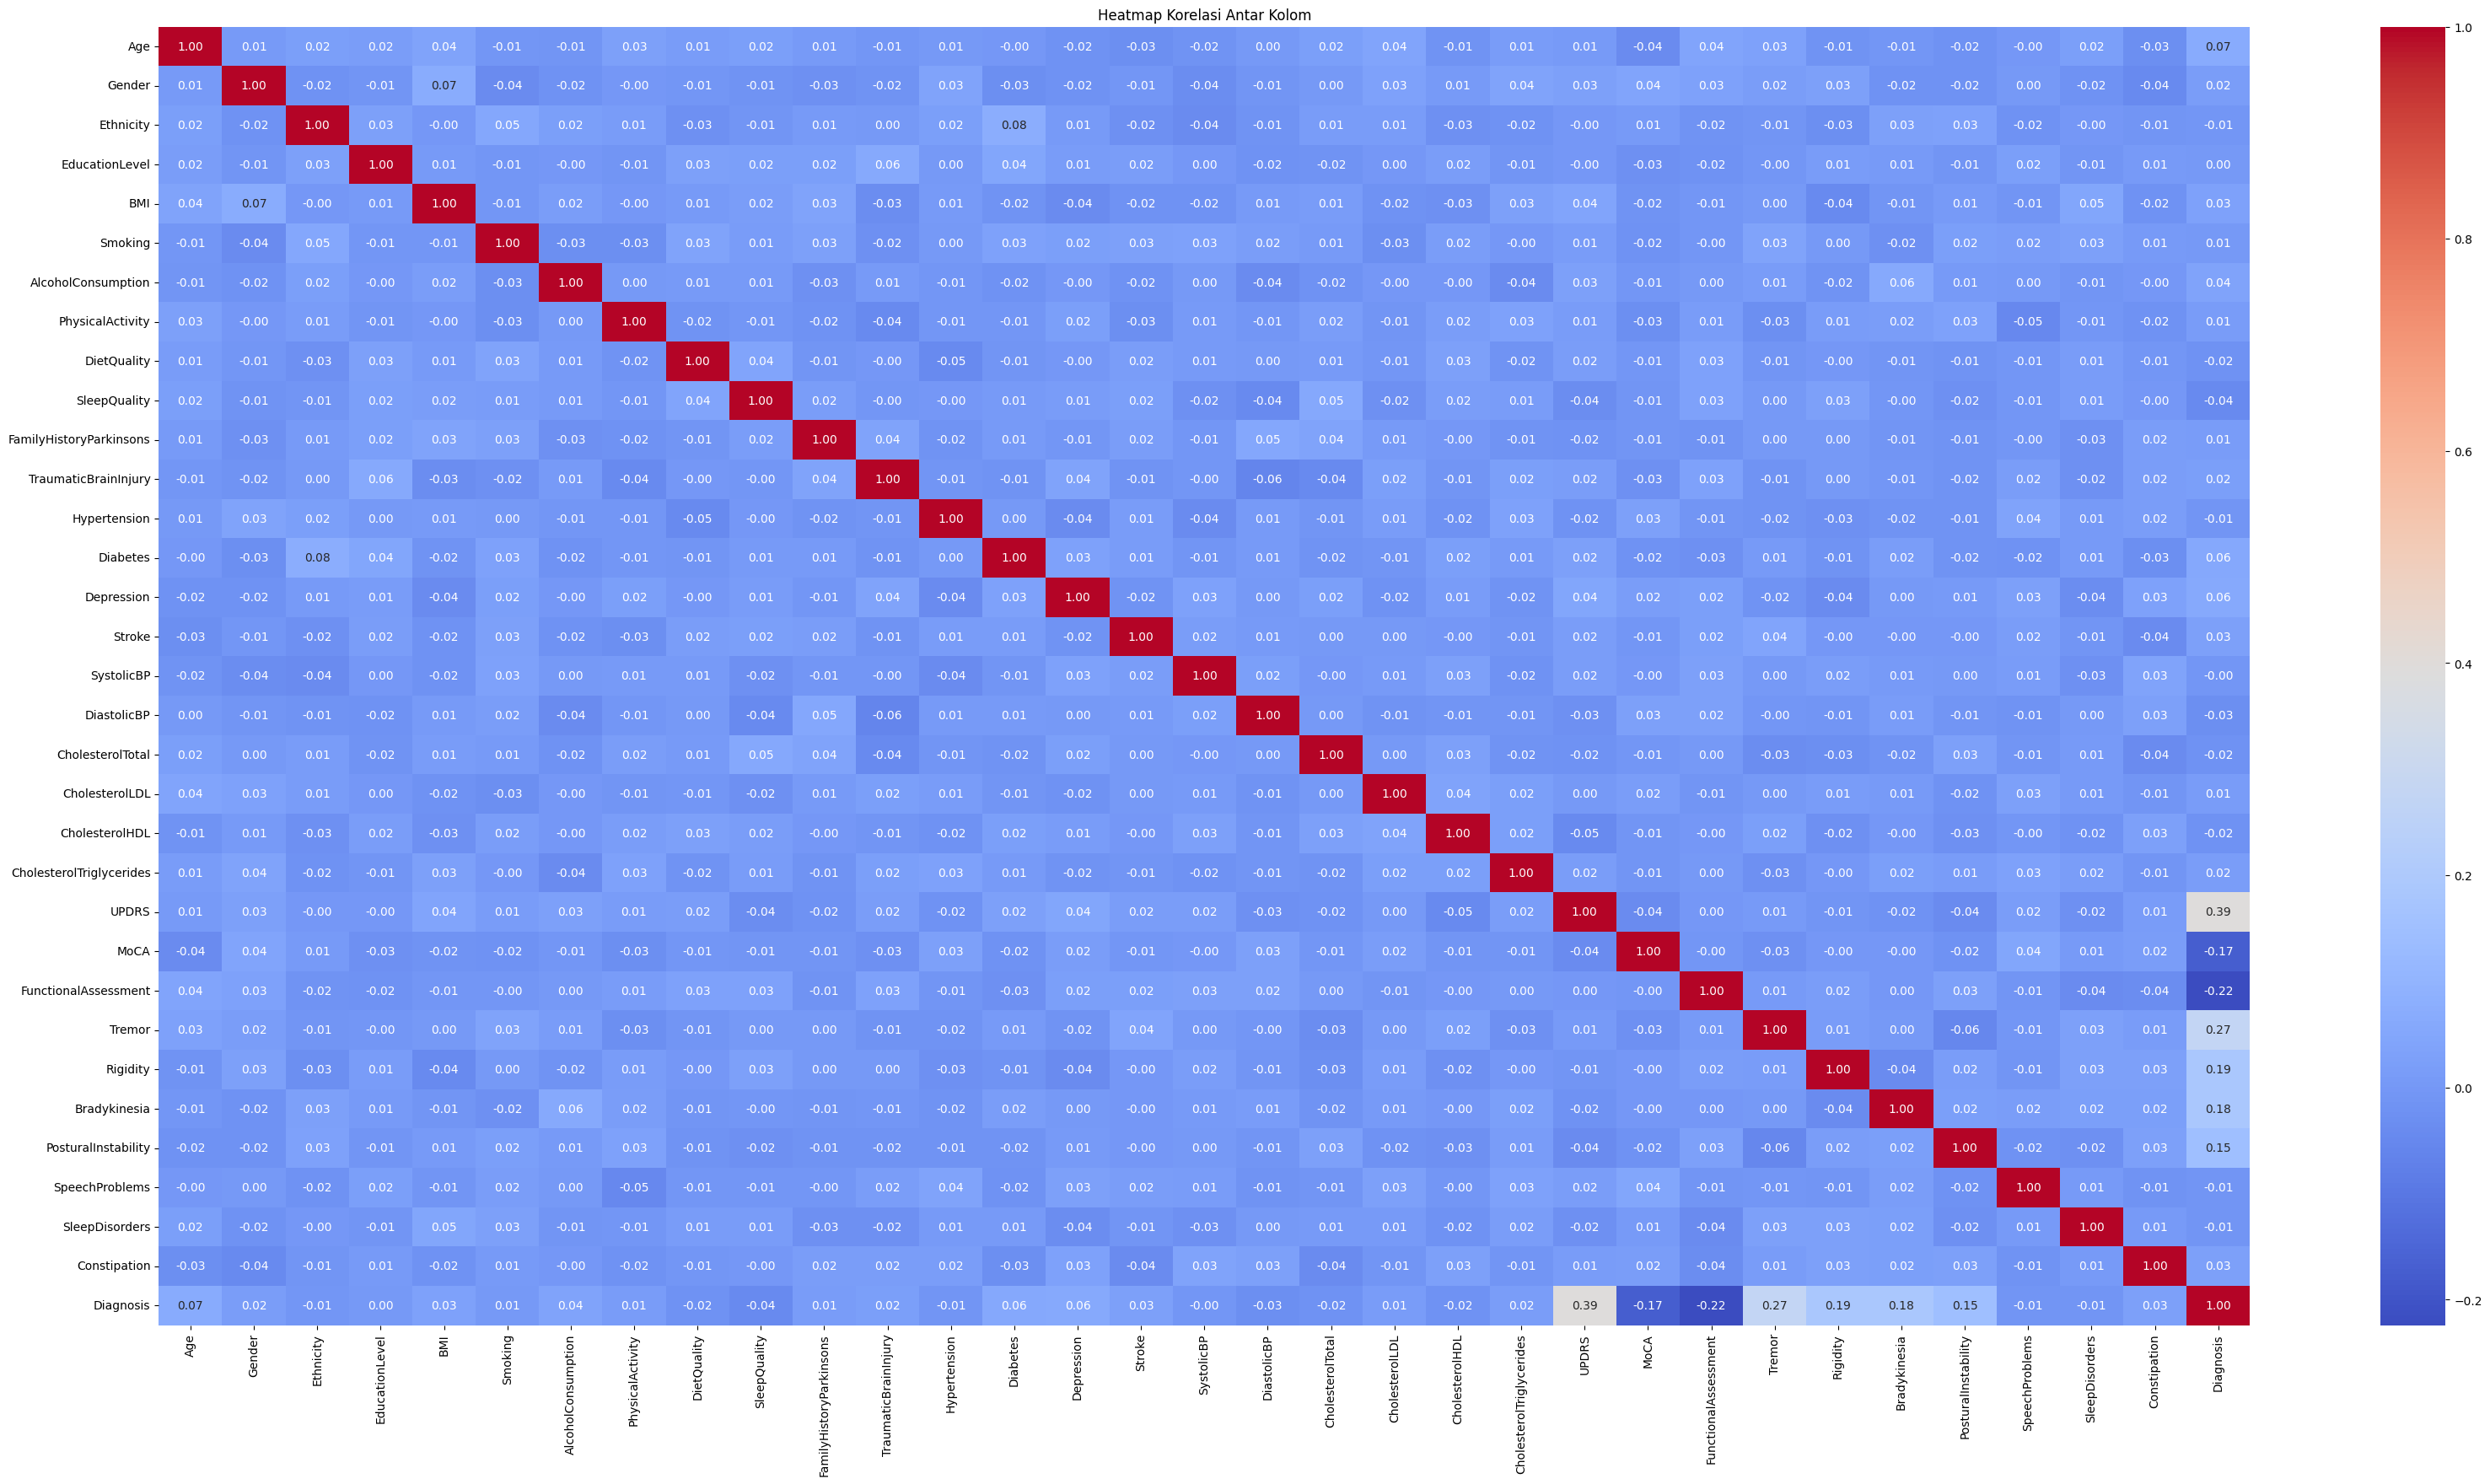

In [68]:
#menampilkan korelasi antar fiture
import seaborn as sns
import matplotlib.pyplot as plt

# Mencari korelasi antar kolom
correlation_matrix = parkinson.corr()

# Menciptakan heatmap dari matriks korelasi dengan dimensi yang lebih besar
plt.figure(figsize=(40, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Kolom')
plt.show()

# ***3. Split Data***

In [69]:
# Memisahkan fitur (X) dan target (y)
X = parkinson.drop('Diagnosis', axis=1)
y = parkinson['Diagnosis']

In [70]:
# Menggunakan MinMaxScaler untuk normalisasi fitur
from sklearn.preprocessing import MinMaxScaler
# Normalisasi data
X = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
X

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,0.897436,0.0,1.0,0.333333,0.196768,0.0,0.248099,0.126901,0.402567,0.875475,...,0.029943,0.974810,0.158745,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.641026,0.0,0.0,0.666667,0.055133,1.0,0.295627,0.835551,0.860741,0.271388,...,0.171578,0.412072,0.481464,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.512821,1.0,0.0,0.000000,0.017110,0.0,0.100285,0.016635,0.663498,0.987643,...,0.324144,0.998099,0.225760,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.051282,0.0,0.0,0.000000,0.022814,0.0,0.293726,0.125951,0.686312,0.037072,...,0.249049,0.698194,0.347909,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.948718,0.0,0.0,0.333333,0.148289,0.0,0.481939,0.107414,0.482890,0.884981,...,0.102186,0.280894,0.329373,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,0.948718,1.0,0.0,0.666667,0.946293,0.0,0.623099,0.525190,0.610266,0.385456,...,0.944392,0.959601,0.802757,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2101,0.435897,0.0,0.0,0.333333,0.757129,1.0,0.045152,0.009981,0.500000,0.394962,...,0.873099,0.440589,0.170627,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2102,0.384615,0.0,0.0,0.666667,0.336502,0.0,0.302757,0.574620,0.037548,0.956274,...,0.544677,0.888783,0.480989,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2103,0.282051,1.0,0.0,0.000000,0.080323,1.0,0.014259,0.229087,0.959601,0.704373,...,0.724335,0.647338,0.827471,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [71]:
# Menampilkan distribusi kelas sebelum SMOTE
print("Distribusi Kelas Sebelum SMOTE:")
print(y.value_counts())

Distribusi Kelas Sebelum SMOTE:
Diagnosis
1    1304
0     801
Name: count, dtype: int64


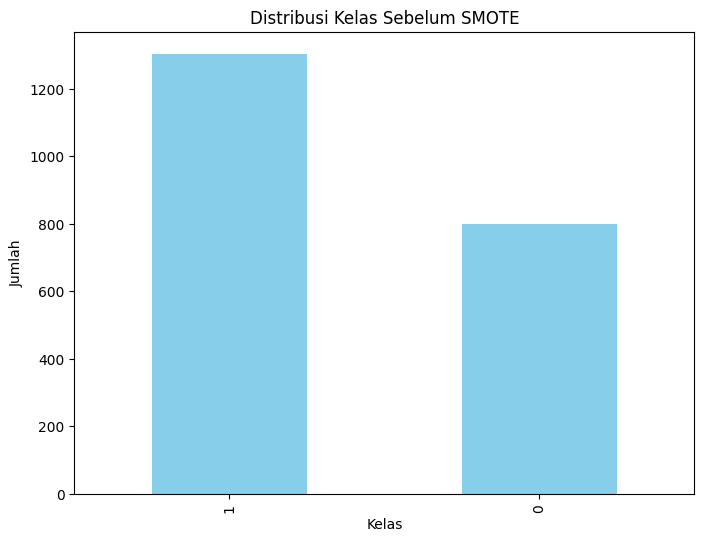

In [72]:
# Visualisasi distribusi kelas sebelum SMOTE
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='skyblue', title='Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


Distribusi Kelas Setelah SMOTE:
Diagnosis
0    1304
1    1304
Name: count, dtype: int64


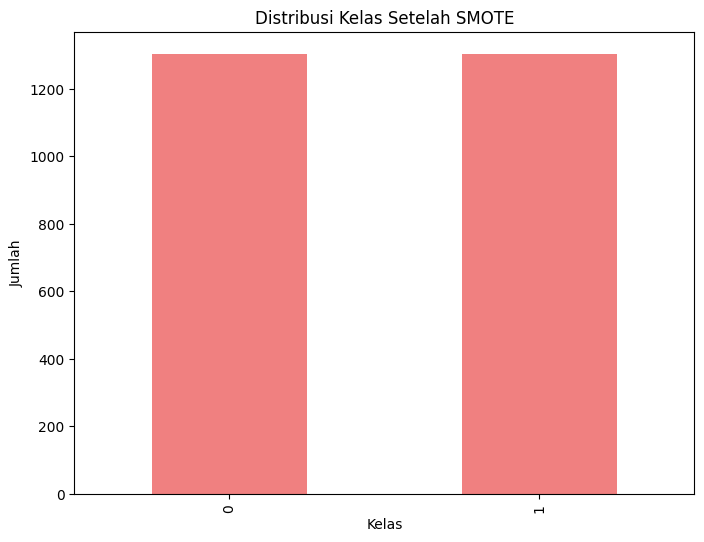

In [73]:
# Terapkan SMOTE untuk menangani ketidakseimbangan kelas
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE
X, y = smote.fit_resample(X, y)

# Menampilkan distribusi kelas setelah SMOTE
print("\nDistribusi Kelas Setelah SMOTE:")
print(y.value_counts())

# Visualisasi distribusi kelas setelah SMOTE
plt.figure(figsize=(8, 6))
y.value_counts().plot(kind='bar', color='lightcoral', title='Distribusi Kelas Setelah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()

In [74]:
# Split dataset menjadi data latih (train) dan data uji (test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah seluruh dataset:", len(X))
print("Jumlah dataset setelah splitting data untuk training:", len(X_train))
print("Jumlah dataset setelah splitting data untuk testing:", len(X_test))

Jumlah seluruh dataset: 2608
Jumlah dataset setelah splitting data untuk training: 2086
Jumlah dataset setelah splitting data untuk testing: 522


In [75]:
X.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
count,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,...,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000,2608.000000
mean,0.492767,0.489829,0.228108,0.444972,0.499467,0.287446,0.497118,0.493663,0.499931,0.502802,...,0.473353,0.509124,0.514906,0.396235,0.231678,0.184585,0.119775,0.297097,0.238489,0.283846
std,0.290896,0.497290,0.326249,0.291954,0.281210,0.450585,0.281270,0.279747,0.281328,0.280851,...,0.286349,0.284634,0.281219,0.486676,0.418267,0.385402,0.322269,0.453775,0.422573,0.448016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.000000,0.000000,0.333333,0.260337,0.000000,0.256060,0.258912,0.259916,0.264140,...,0.216835,0.266834,0.276972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.502115,0.000000,0.000000,0.333333,0.497386,0.000000,0.494492,0.484194,0.499762,0.510960,...,0.459363,0.511169,0.529705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.738388,1.000000,0.333333,0.666667,0.741784,1.000000,0.734910,0.727779,0.741051,0.740887,...,0.718637,0.754872,0.756096,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2086, 32)
(522, 32)
(2086,)
(522,)


# ***4. Model Training***

In [ ]:
#menampilkan semua data setelah dismote beserta result
data_akhir = pd.concat([X_train, y_train], axis=1)
data_akhir

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
49,0.205128,1.0,0.000000,0.333333,0.101236,0.0,0.566540,0.695817,0.159696,0.076521,...,0.509030,0.225285,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
582,0.974359,1.0,0.000000,0.666667,0.081749,0.0,0.458175,0.998099,0.679658,0.369772,...,0.946293,0.778992,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2371,0.918191,1.0,0.687837,0.936488,0.846061,0.0,0.333429,0.774750,0.636297,0.410947,...,0.416217,0.507641,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
48,0.538462,1.0,1.000000,0.333333,0.155894,1.0,0.832700,0.953897,0.314163,0.046103,...,0.323194,0.246198,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1674,0.692308,0.0,0.000000,0.333333,0.368821,1.0,0.416350,0.882605,0.884030,0.049905,...,0.090779,0.557985,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.461538,0.0,0.000000,0.333333,0.617395,1.0,0.400665,0.191065,0.165875,0.919202,...,0.820817,0.371673,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1095,0.025641,1.0,0.000000,1.000000,0.730989,1.0,0.280418,0.211502,0.409221,0.861217,...,0.768536,0.107890,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1130,0.435897,0.0,0.000000,0.666667,0.330798,0.0,0.061312,0.877376,0.010456,0.930133,...,0.842681,0.230513,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1294,0.589744,0.0,1.000000,0.333333,0.421103,0.0,0.373099,0.598384,0.467681,0.331749,...,0.567490,0.978137,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
# Menyiapkan kombinasi parameter untuk tuning model XGBoost
params = [
    {'max_depth': 5, 'eta': 0.1, 'min_child_weight': 5, 'n_estimators': 50, 'random_state': 0},
    {'max_depth': 10, 'eta': 0.2, 'min_child_weight': 1, 'n_estimators': 60, 'random_state': 50},
    {'max_depth': 7, 'eta': 0.3, 'min_child_weight': 1, 'n_estimators': 70, 'random_state': 500},
    {'max_depth': 12, 'eta': 0.4, 'min_child_weight': 2, 'n_estimators': 100, 'random_state': 40},
    {'max_depth': 15, 'eta': 0.09, 'min_child_weight': 1, 'n_estimators': 100, 'random_state': 100},
    {'max_depth': 6, 'eta': 0.15, 'min_child_weight': 3, 'n_estimators': 80, 'random_state': 10},
    {'max_depth': 8, 'eta': 0.25, 'min_child_weight': 4, 'n_estimators': 90, 'random_state': 150},
    {'max_depth': 9, 'eta': 0.05, 'min_child_weight': 2, 'n_estimators': 120, 'random_state': 200},
    {'max_depth': 11, 'eta': 0.35, 'min_child_weight': 1, 'n_estimators': 110, 'random_state': 300},
]

In [49]:
# Feature Selection
print("### Feature Selection ###")
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

### Feature Selection ###
Selected Features: Index(['Age', 'Diabetes', 'Depression', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia',
       'PosturalInstability'],
      dtype='object')


No: 1, Accuracy: 0.908, Params: {'max_depth': 5, 'eta': 0.1, 'min_child_weight': 5, 'n_estimators': 50, 'random_state': 0}


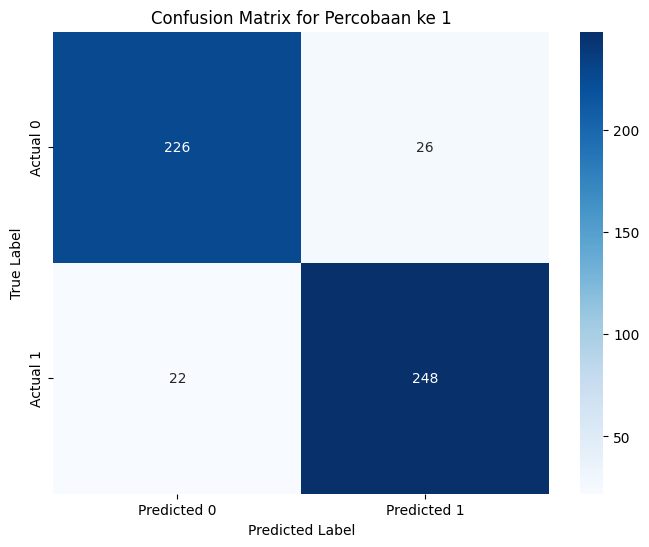

No: 2, Accuracy: 0.918, Params: {'max_depth': 10, 'eta': 0.2, 'min_child_weight': 1, 'n_estimators': 60, 'random_state': 50}


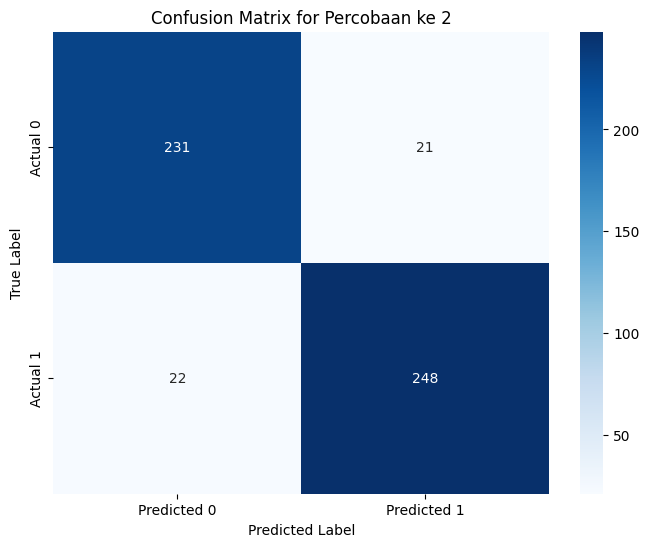

No: 3, Accuracy: 0.921, Params: {'max_depth': 7, 'eta': 0.3, 'min_child_weight': 1, 'n_estimators': 70, 'random_state': 500}


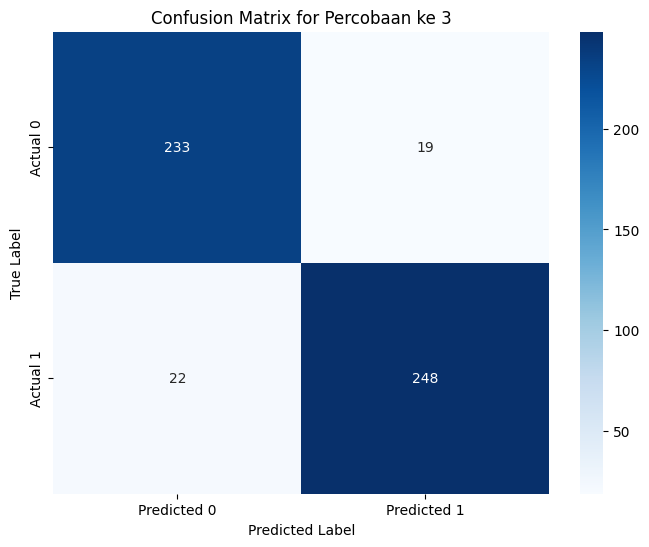

No: 4, Accuracy: 0.925, Params: {'max_depth': 12, 'eta': 0.4, 'min_child_weight': 2, 'n_estimators': 100, 'random_state': 40}


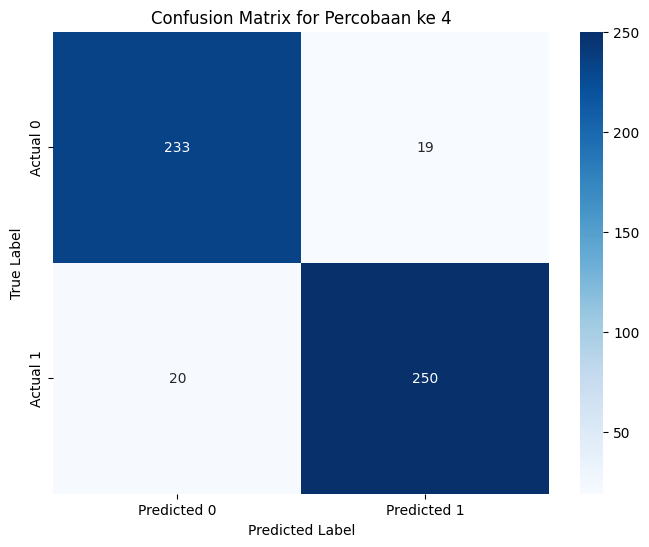

No: 5, Accuracy: 0.923, Params: {'max_depth': 15, 'eta': 0.09, 'min_child_weight': 1, 'n_estimators': 100, 'random_state': 100}


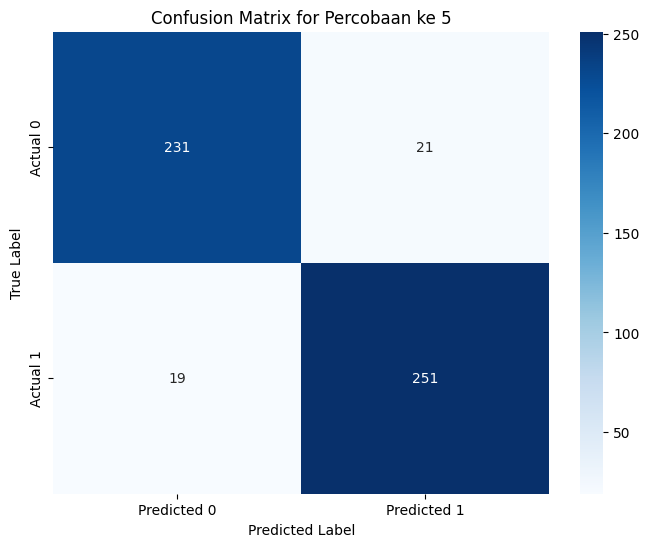

No: 6, Accuracy: 0.927, Params: {'max_depth': 6, 'eta': 0.15, 'min_child_weight': 3, 'n_estimators': 80, 'random_state': 10}


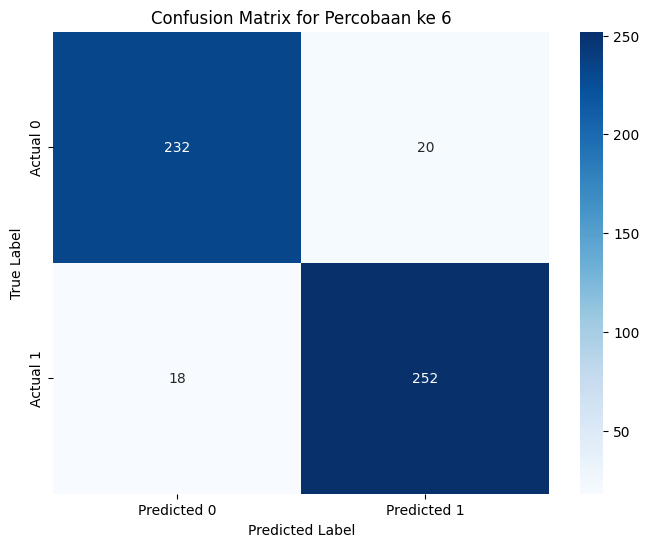

No: 7, Accuracy: 0.921, Params: {'max_depth': 8, 'eta': 0.25, 'min_child_weight': 4, 'n_estimators': 90, 'random_state': 150}


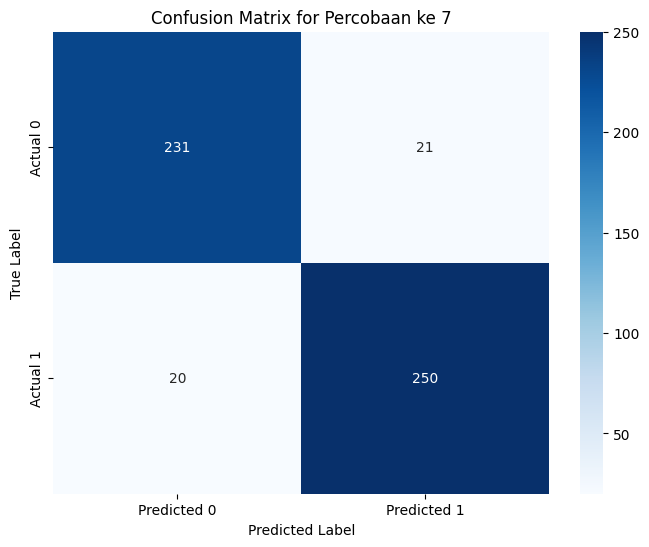

No: 8, Accuracy: 0.923, Params: {'max_depth': 9, 'eta': 0.05, 'min_child_weight': 2, 'n_estimators': 120, 'random_state': 200}


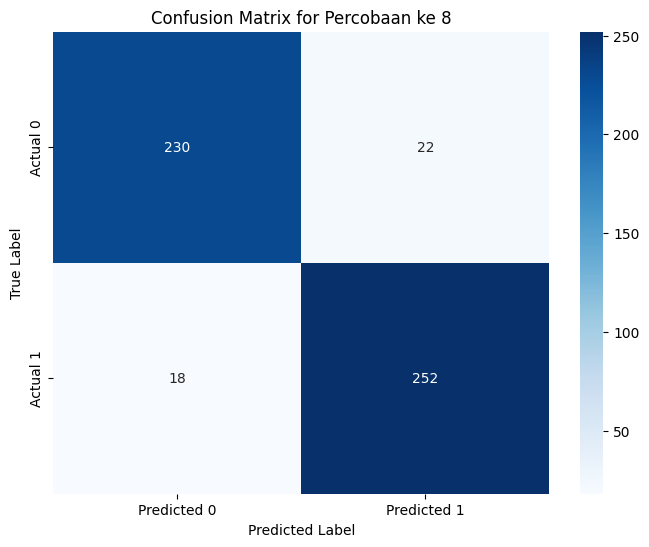

No: 9, Accuracy: 0.923, Params: {'max_depth': 11, 'eta': 0.35, 'min_child_weight': 1, 'n_estimators': 110, 'random_state': 300}


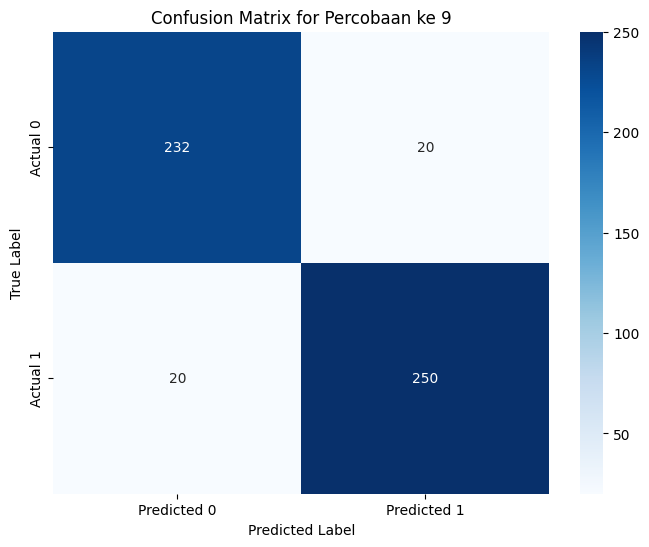

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Menyimpan akurasi untuk setiap percobaan
accuracies = []

# Evaluasi model untuk setiap kombinasi parameter
for i, param in enumerate(params, 1):
    # Inisialisasi model dengan parameter saat ini
    model = XGBClassifier(
        max_depth=param['max_depth'],
        learning_rate=param['eta'],
        min_child_weight=param['min_child_weight'],
        n_estimators=param['n_estimators'],
        random_state=param['random_state']
    )

    # Latih model dengan data latih
    model.fit(X_train, y_train)

    # Prediksi hasil
    y_pred = model.predict(X_test)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    # Tampilkan akurasi dan parameter
    print(f"No: {i}, Accuracy: {acc:.3f}, Params: {param}")

    # Membuat confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Menampilkan confusion matrix menggunakan seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])

    # Memberi judul dan label pada grafik
    plt.title(f'Confusion Matrix for Percobaan ke {i}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Tampilkan confusion matrix
    plt.show()


In [51]:
# Hitung Mean Squared Error (MSE) dan R-squared (R²)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.07662835249042145
R-squared (R²): 0.693121693121693


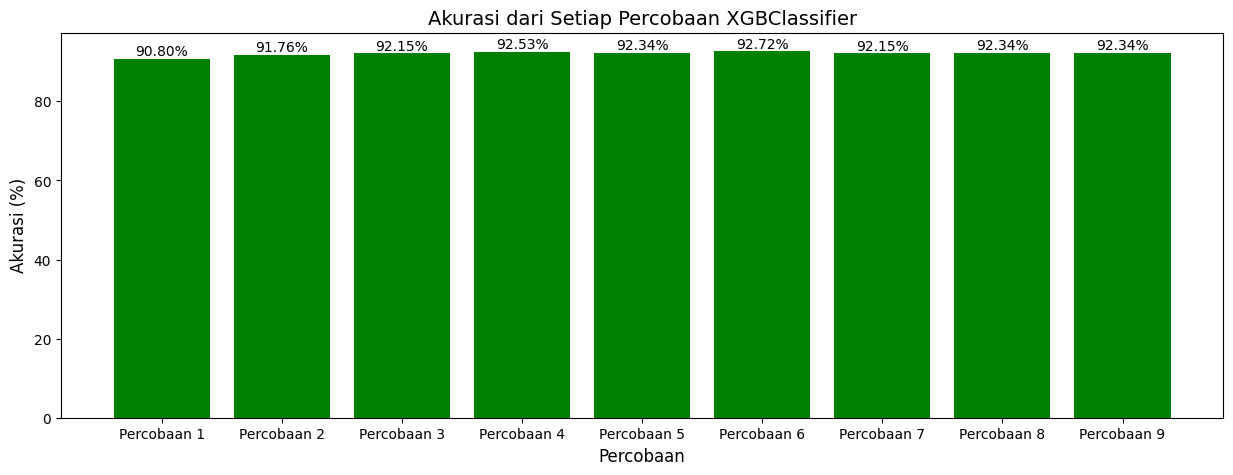

In [ ]:
# Membuat bar graph akurasi
plt.figure(figsize=(15, 5))
plt.bar([f"Percobaan {i+1}" for i in range(len(accuracies))], [a * 100 for a in accuracies], color='green')
plt.xlabel("Percobaan", fontsize=12)
plt.ylabel("Akurasi (%)", fontsize=12)
plt.title("Akurasi dari Setiap Percobaan XGBClassifier", fontsize=14)
for i, acc in enumerate(accuracies):
    plt.text(i, acc * 100, f"{acc:.2%}", ha='center', va='bottom')
plt.show()

<Figure size 2000x1000 with 0 Axes>

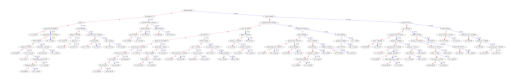

In [ ]:
from xgboost import XGBClassifier, plot_tree
import matplotlib.pyplot as plt

# Inisialisasi model dan pelatihan
model = XGBClassifier(
    max_depth=11,
    learning_rate=0.35,
    min_child_weight=1,
    n_estimators=110,
    random_state=300
)
model.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(20, 10))  # Ukuran figure untuk visualisasi
plot_tree(model, num_trees=0)  # Tampilkan tree ke-0
plt.show()


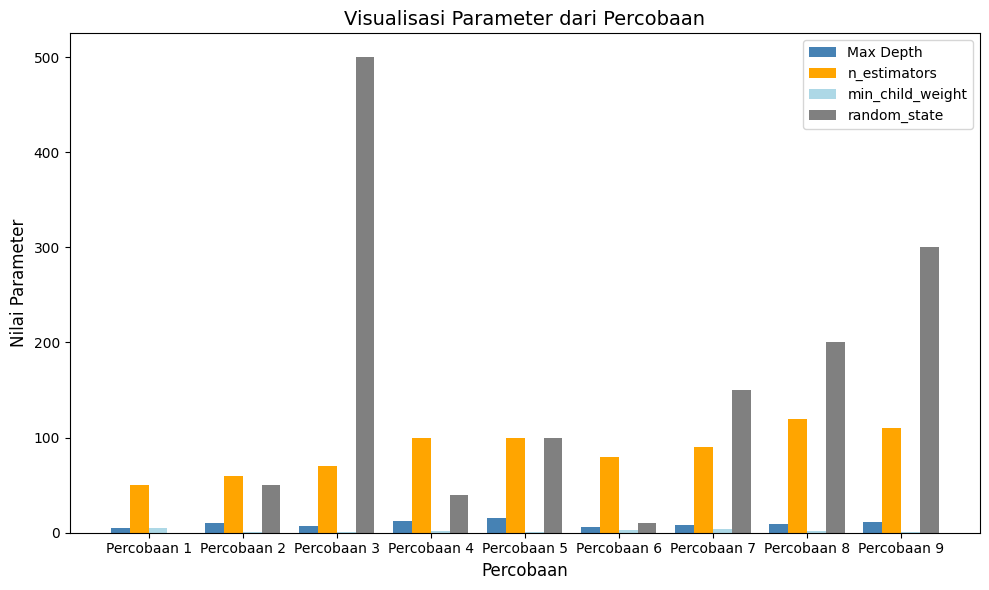

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Kombinasi parameter dan hasil akurasi
percobaan = ['Percobaan 1', 'Percobaan 2', 'Percobaan 3', 'Percobaan 4', 'Percobaan 5', 'Percobaan 6', 'Percobaan 7', 'Percobaan 8', 'Percobaan 9']
max_depth = [5, 10, 7, 12, 15, 6, 8, 9, 11]
# n_estimators should have the same length as percobaan
n_estimators = [50, 60, 70, 100, 100, 80, 90, 120, 110]
min_child_weight = [5, 1, 1, 2, 1, 3, 4, 2, 1]
random_state = [0, 50, 500, 40, 100, 10, 150, 200, 300]

# Plot parameter
x = np.arange(len(percobaan))  # Index untuk percobaan
width = 0.2  # Lebar batang

fig, ax = plt.subplots(figsize=(10, 6))

# Batang untuk setiap parameter
ax.bar(x - 1.5 * width, max_depth, width, label='Max Depth', color='steelblue')
ax.bar(x - 0.5 * width, n_estimators, width, label='n_estimators', color='orange')
ax.bar(x + 0.5 * width, min_child_weight, width, label='min_child_weight', color='lightblue')
ax.bar(x + 1.5 * width, random_state, width, label='random_state', color='gray')

# Label dan tata letak
ax.set_xlabel('Percobaan', fontsize=12)
ax.set_ylabel('Nilai Parameter', fontsize=12)
ax.set_title('Visualisasi Parameter dari Percobaan', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(percobaan)
ax.legend()

# Tampilkan grafik
plt.tight_layout()
plt.show()

# ***5. Model Evaluation***

In [ ]:
# Bagian pertama: Evaluasi Akurasi
# ================================

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier # Importing XGBClassifier

# Assuming the best parameters were found in the previous experiments
# Replace these with the actual best parameters you found
best_params = {
    'max_depth': 11,
    'learning_rate': 0.35,
    'min_child_weight': 1,
    'n_estimators': 110,
    'random_state': 300
}

# Initialize the best model with the best parameters
best_model = XGBClassifier(**best_params)

# Train the best model using the training data
best_model.fit(X_train, y_train)

# Prediksi hasil dengan data uji (X_test)
y_pred = best_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.3f}")

Akurasi Model: 0.923


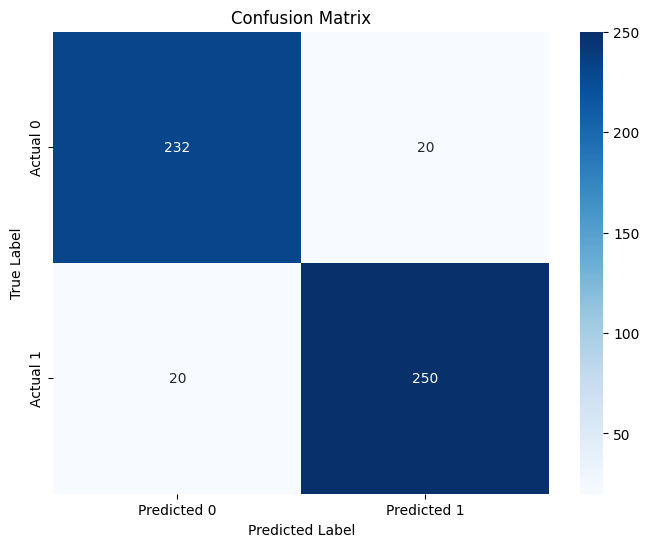

In [ ]:
# Bagian kedua: Confusion Matrix
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'model', 'X_test', and 'y_test' are already defined
y_pred = model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

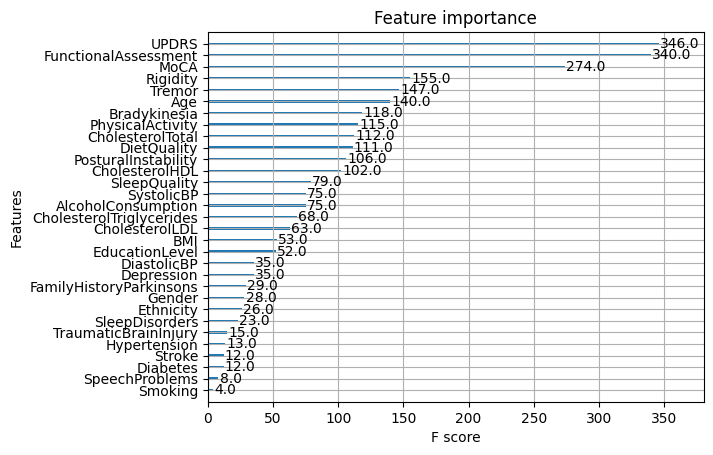

In [ ]:
xgb.plot_importance(model)

In [ ]:
# Bagian ketiga: Classification Report
# ====================================

from sklearn.metrics import classification_report

# Menampilkan classification report yang mencakup precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       252
           1       0.93      0.93      0.93       270

    accuracy                           0.92       522
   macro avg       0.92      0.92      0.92       522
weighted avg       0.92      0.92      0.92       522



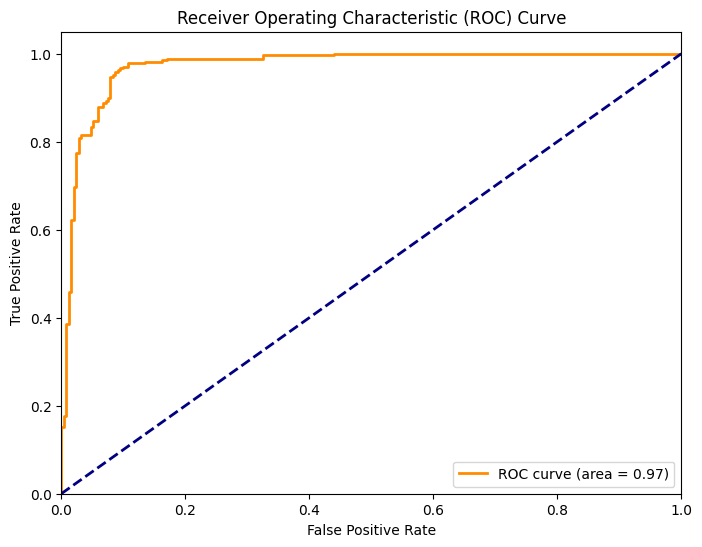

AUC Score: 0.973


In [ ]:
# Bagian keempat: ROC Curve dan AUC Score
# =======================================

from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk kelas positif (1)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Menghitung AUC score
roc_auc = auc(fpr, tpr)

# Menampilkan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Menampilkan AUC Score
print(f"AUC Score: {roc_auc:.3f}")


### Feature Selection ###
Selected Features: Index(['Age', 'Diabetes', 'Depression', 'UPDRS', 'MoCA',
       'FunctionalAssessment', 'Tremor', 'Rigidity', 'Bradykinesia',
       'PosturalInstability'],
      dtype='object')
